# 모델 성능 평가 지표(Evaluation Metrics)
- 실제값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정 하는 것
- 실전에서도 좋은 성능을 보이는 최적의 모델을 찾기 위해 실시
- 모델의 일반화 가능성을 평가
    - 모델의 일반화: 새로운 데이터가 입력으로 들어와도 예측 성능 차이가 나지 않게 하는 것
- 타겟값의 유형 또는 비즈니스 목적에 따라 다른 평가지표 사용



## 모델 평가의 목적
- 모델 성능 측정
    - 모델이 얼마나 정확하게 예측하는지, 즉 실제 데이터에 대한 일반화 능력을 측정
- 최적의 모델 선택
    - 여러 가지 모델 중에서 가장 좋은 성능을 내는 모델을 선택하기 위한 기준을 제공
- 과적합 방지
    - 모델이 학습 데이터에만 너무 잘 맞춰져서 새로운 데이터에 대해서는 오히려 성능이 저하되는 과적합 문제를 방지
- 모델 개선
    - 평가 결과를 바탕으로 모델의 하이퍼파라미터를 조정하거나, 새로운 특성을 추가하여 모델의 성능을 개선

# 회귀문제 성능 측정

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [2]:
# 당뇨병 진행도를 예측하는 데이터셋
train, target = load_diabetes(return_X_y=True, as_frame=True)
train.shape, target.shape

((442, 10), (442,))

In [3]:
train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [5]:
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [6]:
target.min(), target.max()

(np.float64(25.0), np.float64(346.0))

# 학습용과 검증용 분리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# 학습용 입력 데이터, 검증용 입력 데이터, 학습용 정답데이터, 검증용 정답데이터
x_train, x_valid, y_train, y_valid = train_test_split(train, target, random_state=42)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((331, 10), (111, 10), (331,), (111,))

# 모델 학습 및 검증데이터에 대한 예측

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(x_train, y_train) # 학습

LinearRegression()

In [11]:
pred = model.predict(x_valid)
pred.shape

(111,)

## 회귀 평가 지표
- 수치형 타겟값에 대한 예측 성능을 평가하는 지표
- 실제값과 예측값의 차이인 오차를 계산하여 모델을 평가


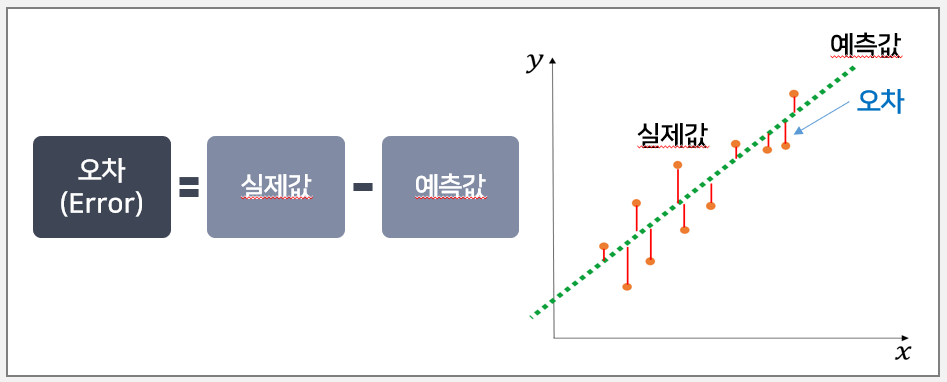

### MSE(Mean Squared Error)
- 실제 값과 예측 값의 차이를 제곱한 뒤 평균
- 이상치에 민감 -> 이상치도 예측해야 할 경우 사용
$$
MSE = \frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}
$$


In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, pred)

np.float64(2848.3106508475057)

### RMSE(Root Mean Squared Error)
- MSE에 제곱근
- 이상치에 민감
$$
RMSE = \sqrt{\frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}}
$$

In [13]:
mean_squared_error(y_valid, pred) ** 0.5

np.float64(53.369566710321955)

In [14]:
mean_squared_error(y_valid, pred, squared=False)

c:\Users\kwon3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(53.369566710321955)

In [15]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_valid, pred)

np.float64(53.369566710321955)

### MAE(Mean Absolute Error)
- 실제 값과 예측 값의 차이를 절대값으로 변환해 평균
- 이상치에 영향을 받지 않음 -> 이상치는 예측하지 않아도 되는 경우
$$
MAE = \frac{1}{n}{\sum_{i=1}^{n}|y_i-\hat{y}_i|}
$$

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid, pred)

np.float64(41.54850685988061)

### MAPE(Mean Absolute Percentage Error)
- 실제값에대한 절대오차 비율의 평균을 퍼센트로 표현
- MAE를 퍼센트로 표현
- 이상치에 영향을 받지 않음
$$
MAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{|y_i|}}
$$

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_valid, pred)

np.float64(0.37310970433744683)

### SMAPE(Symmetric Mean Absolute Percentage Error)
- 기존 MAPE의 단점을 보완
- 다른 점은 각 실제값과 예측값을 절대값으로 변경 후 합으로 나눈다.
- MAPE 와 다르게 실제값에 0이 존재해도 계산이 가능

$$
SMAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{{|y_i|}+|\hat{y_i}|}}
$$


In [ ]:
def smape(true, pred):
    err = np.abs(true-pred) / (np.abs(true) + np.abs(pred))
    return np.mean(err)

smape(y_valid, pred)

0.15271405979135066

# 분류문제 성능 측정
- 범주형 타겟값에 대한 예측 성능을 평가하는 지표
- 모델이 예측한 확률 또는 확률에 의해 분류된 값을 계산하여 모델을 평가





## 분류문제에서 모델의 출력
- 0~1 사이의 확률 또는 음수에서 양수 사이의 실수를 예측값으로 출력
- Scikit-learn에서는 predict_proba, decision_function 메서드로 제공


## 임계값(Thresholds)
- 확률 또는 음수에서 양수 사이의 실수의 출력을 0 또는 1로 분류해주는 기준
- scikit-learn의 predict 메서드
    - 확률의 경우는 0.5 이상, 실수의 경우는 0 이상일 경우 1로 출력 아닐 경우 0으로 출력




In [18]:
# 0~9 손글씨 이미지 데이터셋
from sklearn.datasets import load_digits

In [19]:
train = load_digits()["data"]
train.shape # 입력데이터

(1797, 64)

In [20]:
target = load_digits()["target"]
target.shape # 정답데이터

(1797,)

In [21]:
train[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

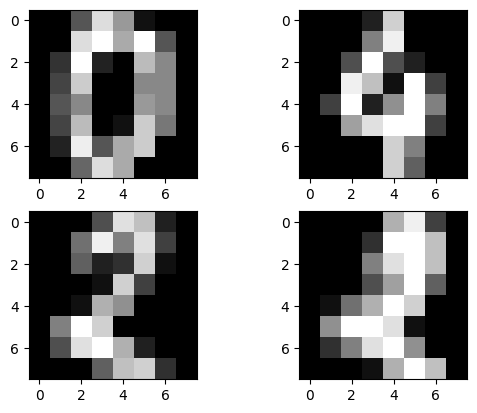

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(train[0].reshape(8,8), cmap="gray")
ax[0,1].imshow(train[100].reshape(8,8), cmap="gray")
ax[1,0].imshow(train[50].reshape(8,8), cmap="gray")
ax[1,1].imshow(train[77].reshape(8,8), cmap="gray")

plt.show()

# 숫자 3을 맞추는 문제로 재정의
- 숫자 3을 1로 변경하고, 나머지를 0으로 정답값을 재정의해서 불균형한 데이터셋으로 변환

In [23]:
target = (target == 3).astype(int)
target.shape

(1797,)

In [25]:
target.mean()

np.float64(0.1018363939899833)

## 학습용과 검증용 분리

In [26]:
x_train, x_valid, y_train, y_valid = train_test_split(train, target, random_state=42)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

## 혼동 행렬(Confusion Matrix)
- 분류문제에서 예측 오류가 어느 정도 인지와 어떠한 유형의 예측 오류가 발생하는지 시각화한 표
- TN: 실제값이 음성이고 예측값도 음성인 개수(참 음성)
- TP: 실제값이 양성이고 예측값도 양성인 개수(참 양성)
- FN: 실제값이 양성이고 예측값이 음성인 개수(거짓 음성)
- FP: 실제값이 음성이고 예측값이 양성인 개수(거짓 양성)



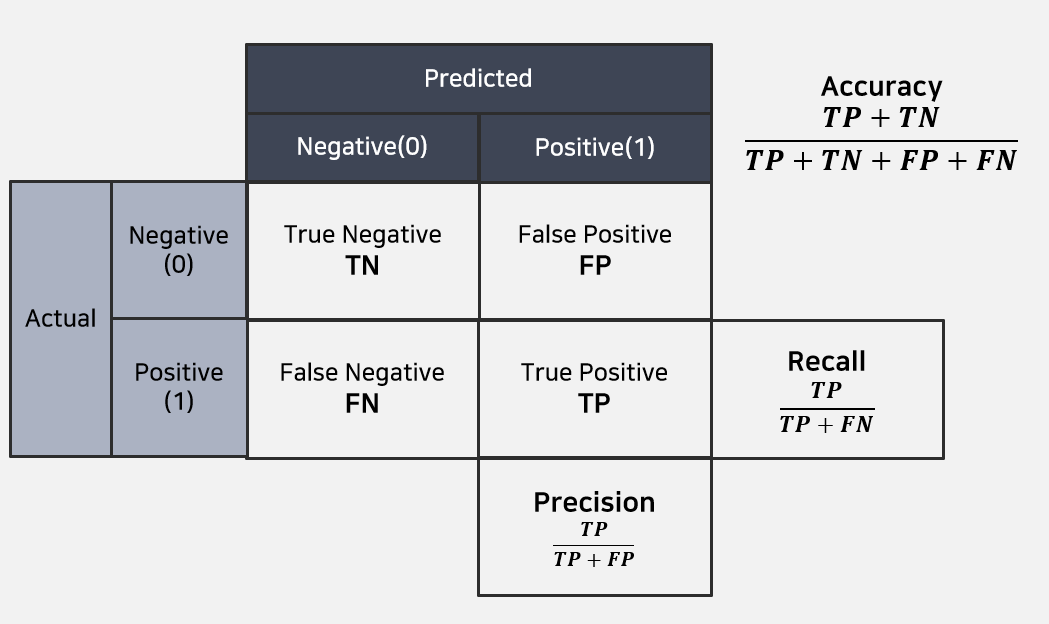

## 정확도, 정밀도, 재현율
- 정확도(Accuracy): 모델이 정답을 맞춘 비율
- 정밀도(Precision): 모델이 양성으로 예측한 샘플들 중에서 맞춘 비율
- 재현율(Recall): 실제 양성 샘플들 중에서 모델이 맞춘 비율



- 정확도(accuracy) 한계
    - 데이터에서 음성(0)이 훨씬 많은 경우 음성으로만 예측해도 높은 정확도가 나오기 때문에 적절한 성능 평가 지표가 되지 못함
- 암 진단 예측 문제에서 암환자를 1로 두었을 경우
    - 암환자(1)를 정상환자(0)로 예측해서 제때 치료를 받지 못하는 경우(FN 오류)를 줄이는 것이 중요한 경우 재현율(recall) 확인
- 스팸메일 예측 문제에서 스팸메일을 1로 두었을 경우
    - 정상메일(0)을 스팸메일(1)로 예측해서 정상메일을 확인하지 못하는 경우(FP 오류)를 줄이는 것이 중요한 경우 정밀도(precision) 확인

In [27]:
target.mean()

np.float64(0.1018363939899833)

In [28]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(x_train, y_train)
pred_dummy = dummy.predict(x_valid)
pred_dummy.mean()

np.float64(0.0)

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_valid)
pred_lr.mean()

c:\Users\kwon3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


np.float64(0.10222222222222223)

- 정확도 평가

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, pred_dummy)

0.8977777777777778

In [31]:
accuracy_score(y_valid, pred_lr)

0.9911111111111112

## confusion matrix

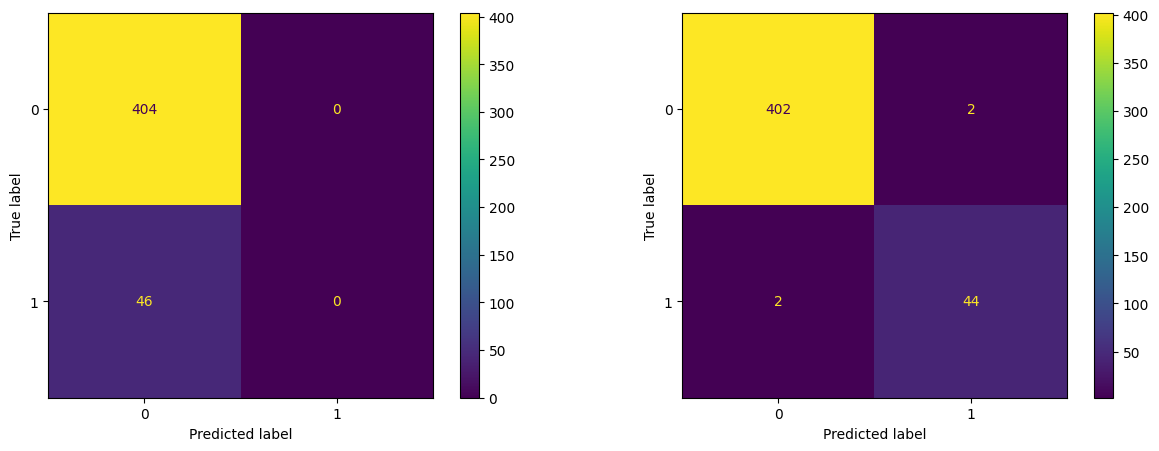

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(1, 2, figsize=[15,5])

# tn, tp, fn, fp 개수
cm = confusion_matrix(y_valid, pred_dummy)
disp = ConfusionMatrixDisplay(cm) # display 객체 반환
disp.plot(ax=ax[0])

cm = confusion_matrix(y_valid, pred_lr)
disp = ConfusionMatrixDisplay(cm) # display 객체 반환
disp.plot(ax=ax[1])

plt.show()

In [32]:
from sklearn.metrics import precision_score, recall_score

In [34]:
precision_score(y_valid, pred_dummy)

c:\Users\kwon3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


np.float64(0.0)

In [35]:
recall_score(y_valid, pred_dummy)

np.float64(0.0)

In [36]:
precision_score(y_valid, pred_lr), recall_score(y_valid, pred_lr)

(np.float64(0.9565217391304348), np.float64(0.9565217391304348))

## Precision-Recall Trade-Off
- Precision과 Recall은 Thresholds에 따라 반비례
- Thresholds 높이는 경우
    - FP개수가 줄어들어 Precision 상승, TP개수가 줄어들어 Recall 하락
- Thresholds 낮추는 경우
    - FP개수가 늘어나서 Precision 하락, TP개수가 늘어나서 Recall 상승





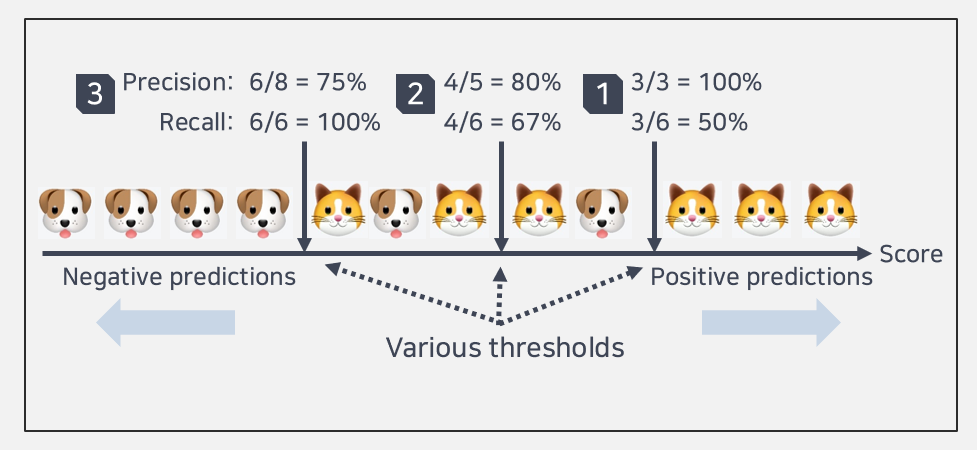

In [38]:
pred_proba = lr.predict_proba(x_valid)[:,1] # 이진 분류에서는 1에 대한 확률만 필요함
pred_proba[:5]

array([2.04126554e-15, 8.44871614e-10, 1.00000000e+00, 6.42846001e-10,
       1.63937553e-05])

In [39]:
thresholds = 0.9
pred = np.where(pred_proba >= thresholds, 1, 0)
precision_score(y_valid, pred), recall_score(y_valid, pred)

(np.float64(0.9772727272727273), np.float64(0.9347826086956522))

In [40]:
thresholds = 0.01
pred = np.where(pred_proba >= thresholds, 1, 0)
precision_score(y_valid, pred), recall_score(y_valid, pred)

(np.float64(0.8181818181818182), np.float64(0.9782608695652174))

## F1-score
- Precision과 Recall의 조화평균
- 산술평균이 아니라 조화평균을 이용하는 이유는
Precision과 Recall을 모두 균형 있게 반영하기 위함

- 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가진다.
- precision과 recall은 trade-off의 관계이기 때문에, 이 둘을 조화 평균한 값인 F1-score를 많이 사용
$$
F1 = 2*\frac{Precision*Recall}{Precision+Recall}
$$


In [41]:
from sklearn.metrics import f1_score
f1_score(y_valid, pred_lr)

np.float64(0.9565217391304348)

In [42]:
f1_score(y_valid, pred_dummy)

np.float64(0.0)

- recall, precision, f1 한번에 확인하기

In [43]:
from sklearn.metrics import classification_report

In [44]:
metrics_str = classification_report(y_valid, pred_lr)
print(metrics_str)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       0.96      0.96      0.96        46

    accuracy                           0.99       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.99      0.99      0.99       450



## AUROC(Area under the ROC Curve)
- AUC 또는 ROC AUC 라고도 함
- ROC curve의 아래 면적 값
- 1에 가까울수록 좋음
    - Poor model (0.5 ~ 0.7)
    - Fair model (0.7 ~ 0.8)
    - Good model (0.8 ~ 0.9)
    - Excellent model (0.9 ~ 1.0)

- 모델의 예측 성능에 대한 품질을 측정



### ROC curve(Receiver Operating Characteristic curve)
- 여러 임계값을 기준으로 FPR(False Positive Rate)를 x축으로, TPR(True Positive Rate)을 y축으로 하여 둘 간의 관계를 표현한 그래프
- FPR(False Positive Rate): FP / (FP + TN)
    - 실제 음성 샘플들 중에서 모델이 못 맞춘 비율
- TPR(True Positive Rate): TP / (FN + TP) ,
    - 실제 양성 샘플들 중에서 모델이 맞춘 비율
    



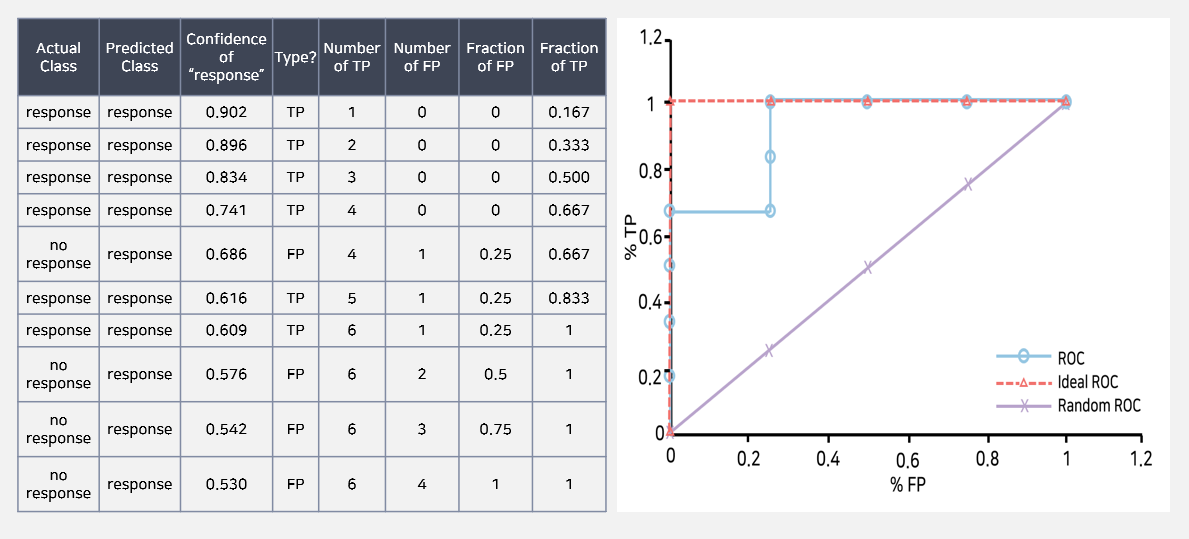

In [45]:
pred = lr.predict_proba(x_valid)[:,1]
pred.shape

(450,)

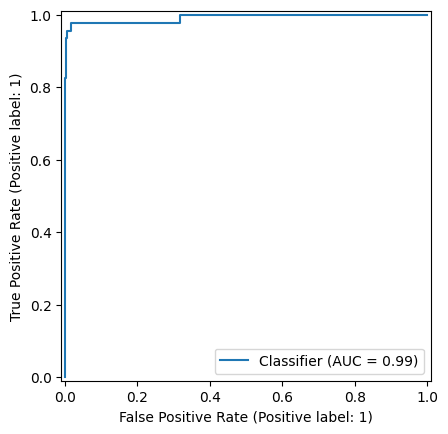

In [46]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_valid, pred)
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid, pred)

np.float64(0.9923590185105466)

## Multi classification 에서의 F1-score
- micro
    - 전체 클래스의 대하여 TP/FP/FN 구한뒤에 F1-score 계산
    - 비중이 큰 클래스만 잘 맞추면 되는 경우
- macro
    - 각 클래스의 대하여 F1-score 계산후 산술평균
    - 비중이 작은 클래스도 잘 맞춰야 되는 경우
- Weighted
    - 각 클래스의 대하여 F1-score 계산후 각 클래스가 차지하는 비율에 따라 가중평균

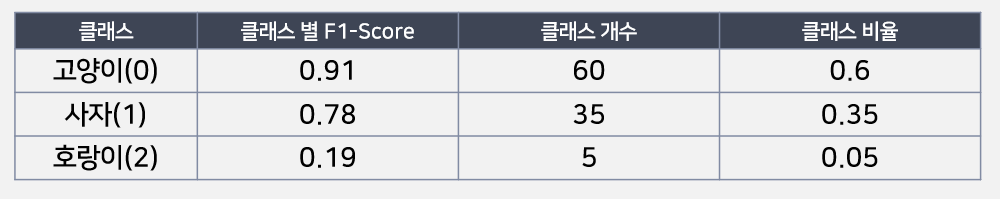

In [48]:
target = load_digits()["target"] # 다중 분류 문제로 변경
target.shape

(1797,)

In [49]:
x_train, x_valid, y_train, y_valid = train_test_split(train, target, random_state=42, test_size=0.3)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1257, 64), (540, 64), (1257,), (540,))

In [50]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [51]:
pred = model.predict(x_valid)
pred.shape

(540,)

In [52]:
f1_score(y_valid, pred, average="micro")

np.float64(0.6592592592592592)

In [53]:
f1_score(y_valid, pred, average="macro")

np.float64(0.634001105919469)

In [54]:
f1_score(y_valid, pred, average="weighted")

np.float64(0.6492748861763314)

In [55]:
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        53
           1       0.50      0.16      0.24        50
           2       0.52      0.26      0.34        47
           3       0.45      0.83      0.58        54
           4       0.80      0.80      0.80        60
           5       0.97      0.85      0.90        66
           6       0.85      0.94      0.89        53
           7       0.83      0.69      0.75        55
           8       0.32      0.81      0.46        43
           9       0.81      0.29      0.42        59

    accuracy                           0.66       540
   macro avg       0.70      0.65      0.63       540
weighted avg       0.72      0.66      0.65       540



### 다중분류에서 확률을 출력하는 방법
- 소프트맥스 함수(Softmax function)
    - 각 클래스에 대한 확률을 추정
    -  입력받은 값들을 출력으로 0~1사이의 값들로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수
$$
softmax(z) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$

In [58]:
model.predict_proba(x_valid)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09090909, 0.02597403, ..., 0.01298701, 0.08658009,
        0.31168831],
       [0.        , 0.09090909, 0.02597403, ..., 0.01298701, 0.08658009,
        0.31168831],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02439024, 0.65853659, ..., 0.        , 0.04878049,
        0.02439024],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## logloss
- 다중 분류에서 자주 사용되는 평가지표
- 모델이 예측한 확률 값을 반영하여 평가
- 0에 가까울 수록 좋은 모델
- 정답 클래스에 해당하는 확률 값을 음의 로그함수에 넣어 평균
- 음의 로그함수
    - 1을 넣으면 0이 출력
    - 0에 가까운 값을 넣을수록 큰 값이 나옴



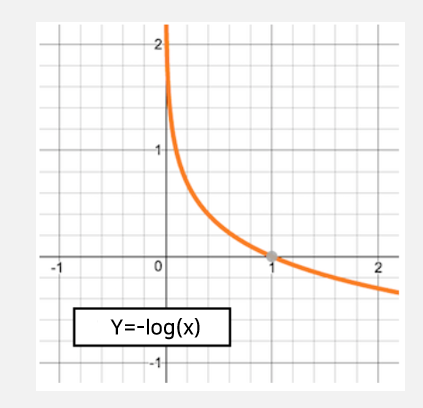

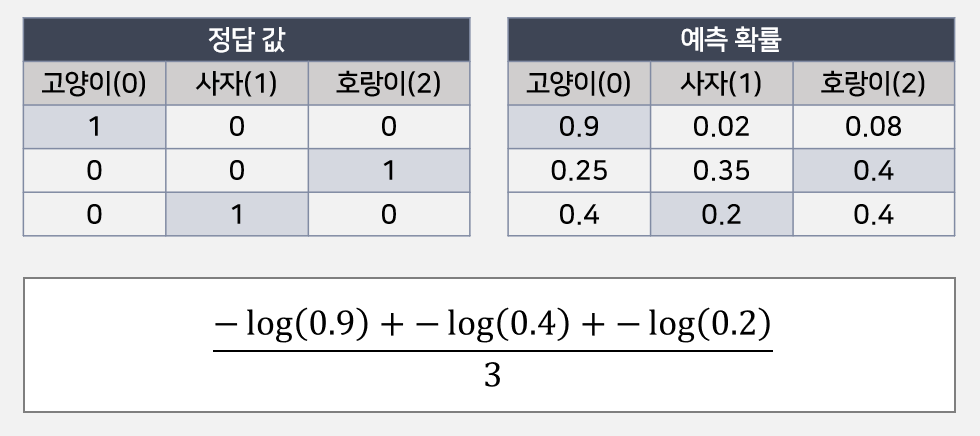

In [59]:
from sklearn.metrics import log_loss

In [60]:
pred = model.predict_proba(x_valid)
pred.shape

(540, 10)

In [61]:
log_loss(y_valid, pred)

2.4843887516086447